In [1]:
%load_ext autoreload
%autoreload 2

import platform 
print(platform.python_version())

import cnp.util
import cnp.graph
import cnp.points

from networkx.algorithms import isomorphism
import networkx as nx

import sympy as sp
from sympy import Symbol, I, S
from sympy.parsing.sympy_parser import parse_expr

3.6.5


In [3]:
import pkgutil
import pysat
import pysat.solvers

for importer, modname, ispkg in pkgutil.iter_modules(pysat.__path__):
    print(modname)

_fileio
card
examples
formula
pb
solvers


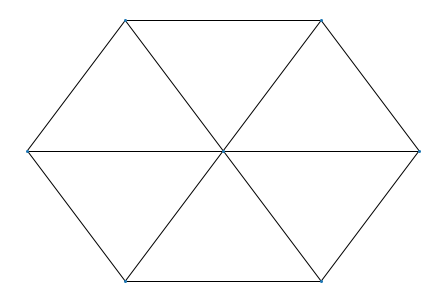

In [8]:
# Create simple set of points.
H = cnp.points.makeH()

# Make unit-length graph from points & display
G = cnp.graph.Graph(H)
G.show()

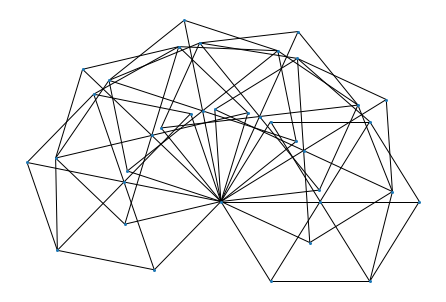

In [9]:
import sympy as sp
from sympy import S, I

for i in range(5):
    # Create a copy of H, rotated about (-1,0) slightly.
    Hr = cnp.points.rotated(H, offset=(-1 + 0*I), angle=2*sp.asin(1/sp.sqrt(12)))
    # And add it to our previous H
    H = cnp.points.add(H, Hr)

# Create unit length graph and draw
G = cnp.graph.Graph(H)
G.show()

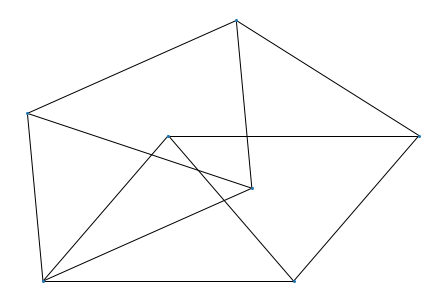

In [43]:
# Look for subgraphs that match moser spindles.
def makeMoser():
    # Make moser spindle
    H = cnp.points.empty()

    w = sp.simplify((1 + I * sp.sqrt(3))/2)

    H = cnp.points.addP(H, (0*I))
    H = cnp.points.addP(H, (1 + 0*I))
    H = cnp.points.addP(H, (w))
    H = cnp.points.addP(H, (1+w))

    # Create a copy of H, rotated about (-1,0) slightly.
    Hr = cnp.points.rotated(H, offset=(0*I), angle=2*sp.asin(1/sp.sqrt(12)))
    # And add it to our previous H
    H = cnp.points.add(H, Hr)

    return cnp.graph.Graph(H)
  
Gmoser = makeMoser()
Gmoser.show()

In [6]:
# Load record smallest graph from file...

# Taken from here:
# https://dustingmixon.wordpress.com/2019/07/08/polymath16-thirteenth-thread-bumping-the-deadline/#comment-23934
# gp = cnp.points.fromFile('graphs/517.vtx')
gp = cnp.points.fromFile('graphs/v34590.vtx')
G_points = (gp, [complex(p) for p in gp])
#print(G_points)

0 %
1 %
2 %
3 %
4 %
5 %
6 %
7 %
8 %
9 %
10 %
11 %
12 %
13 %
14 %
15 %
16 %
17 %
18 %
19 %
20 %
21 %
22 %
23 %
24 %
25 %
26 %
27 %
28 %
29 %
30 %
31 %
32 %
33 %
34 %
35 %
36 %
37 %
38 %
39 %
40 %
41 %
42 %
43 %
44 %
45 %
46 %
47 %
48 %
49 %
50 %
51 %
52 %
53 %
54 %
55 %
56 %
57 %
58 %
59 %
60 %
61 %
62 %
63 %
64 %
65 %
66 %
67 %
68 %
69 %
70 %
71 %
72 %
73 %
74 %
75 %
76 %
77 %
78 %
79 %
80 %
81 %
82 %
83 %
84 %
85 %
86 %
87 %
88 %
89 %
90 %
91 %
92 %
93 %
94 %
95 %
96 %
97 %
98 %
99 %


In [9]:
print(G_points[0][:20])

[0, -17/36 + sqrt(33)/12 + I*(-sqrt(11)/4 + 17*sqrt(3)/36), -sqrt(33)/12 + 17/36 + I*(-sqrt(11)/4 + 17*sqrt(3)/36), 17/18 - sqrt(33)/6, 29/18 - 5*sqrt(33)/18, -29/36 + 5*sqrt(33)/36 + I*(-5*sqrt(11)/12 + 29*sqrt(3)/36), -5*sqrt(33)/36 + 29/36 + I*(-13*sqrt(3)/36 + 7*sqrt(11)/36), -17/18 + sqrt(33)/6 + I*(-sqrt(11)/9 + 2*sqrt(3)/9), -5/36 + sqrt(33)/36 + I*(-7*sqrt(3)/12 + 11*sqrt(11)/36), -5/36 + sqrt(33)/36 + I*(-11*sqrt(11)/36 + 7*sqrt(3)/12), -17/18 + sqrt(33)/6 + I*(-2*sqrt(3)/9 + sqrt(11)/9), -5*sqrt(33)/36 + 29/36 + I*(-7*sqrt(11)/36 + 13*sqrt(3)/36), -29/36 + 5*sqrt(33)/36 + I*(-7*sqrt(11)/36 + 13*sqrt(3)/36), -sqrt(33)/6 + 17/18 + I*(-2*sqrt(3)/9 + sqrt(11)/9), -sqrt(33)/36 + 5/36 + I*(-11*sqrt(11)/36 + 7*sqrt(3)/12), -sqrt(33)/36 + 5/36 + I*(-7*sqrt(3)/12 + 11*sqrt(11)/36), -sqrt(33)/6 + 17/18 + I*(-sqrt(11)/9 + 2*sqrt(3)/9), -29/36 + 5*sqrt(33)/36 + I*(-13*sqrt(3)/36 + 7*sqrt(11)/36), -17/36 + sqrt(33)/12 + I*(-sqrt(3)/4 + 5*sqrt(11)/36), -sqrt(33)/18 + 1/3 + I*(-sqrt(11)/6 +

234724ng... 99 %


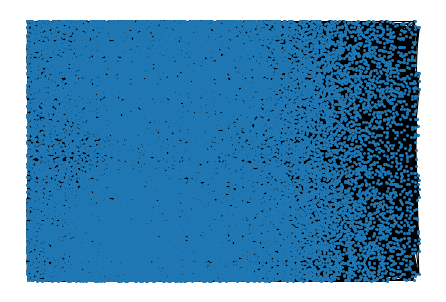

In [38]:
G = cnp.graph.Graph(G_points, large=True)
print(len(G.G.edges))
G.show()

In [77]:
G = nx.read_gpickle("graphs/v34590.gpickle")

In [90]:
nx.write_gpickle(G, "graphs/mos_10.gpickle")

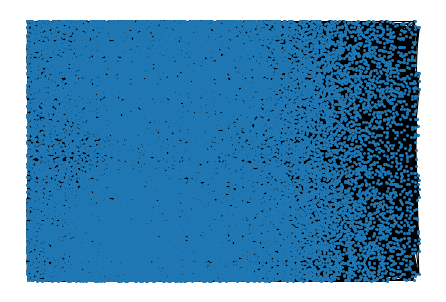

In [66]:
# Create and view graph.
#G = cnp.graph.Graph((G_points))
G.show()

In [41]:
# Check edges
print(len(G.G.edges))

# And prove CNP >= 5 while we're at it...
from cnp.sat import isColourable, genMinGraph, optimize
print("Is colourable in 4 colours?", isColourable(G, 4))

234724


error: Caught keyboard interrupt

In [88]:
GM = isomorphism.GraphMatcher(G.G, Gmoser.G)

i = 0
for iso in GM.subgraph_isomorphisms_iter():
    if i % 100 == 0:
        print(i, iso)
    i += 1
    
# Since there are 8 isomorphisms between two mozer spindles, we just divide by 8.
print("Number of isomorphisms:", i, "But really:", i//8)  # 3400 / 425

Number of isomorphisms: 0 But really: 0


In [82]:
G = nx.read_gpickle("graphs/v34590.gpickle")

Created formula
Core extraction

Removing 48 nodes. 10 left.


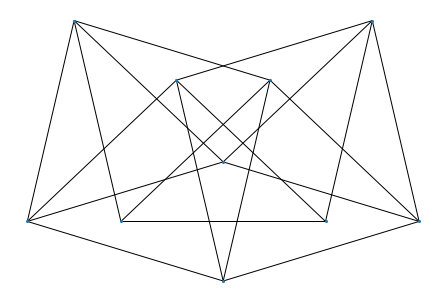

In [85]:
# Look for small non-3 colourable graphs. Moser spindles 2.0?

node_count = len(G.G.nodes)
cnp.sat.optimize(G, num_colours=3, extract_MUS=False, shuffle=True, verbosity=2)
diff = node_count - len(G.G.nodes)
G.show()

In [86]:
node_count = len(G.G.nodes)
cnp.sat.optimize(G, num_colours=3, extract_MUS=True, verbosity=2)
diff = node_count - len(G.G.nodes)

Created formula
Core extraction

c testing node: 29019 -> sat (keeping 29019)
c testing node: 28148 -> sat (keeping 28148)
c testing node: 23632 -> sat (keeping 23632)
c testing node: 23470 -> sat (keeping 23470)
c testing node: 17744 -> sat (keeping 17744)
c testing node: 17595 -> sat (keeping 17595)
c testing node: 16816 -> sat (keeping 16816)
c testing node: 14599 -> sat (keeping 14599)
c testing node: 5943 -> sat (keeping 5943)
c testing node: 1309 -> sat (keeping 1309)
Removing 0 nodes. 10 left.


[0, -sqrt(3)*I/3, -1/2 - sqrt(3)*I/6, -1/4 + sqrt(33)/12 + I*(-sqrt(3)/4 + sqrt(11)/4), -sqrt(33)/12 - 1/4 + I*(-sqrt(3)/12 + sqrt(11)/4), -sqrt(33)/6 - sqrt(3)*I/6, 1/2 - sqrt(3)*I/6, 1/4 + sqrt(33)/12 + I*(-sqrt(3)/12 + sqrt(11)/4), -sqrt(33)/12 + 1/4 + I*(-sqrt(3)/4 + sqrt(11)/4), sqrt(33)/6 - sqrt(3)*I/6]


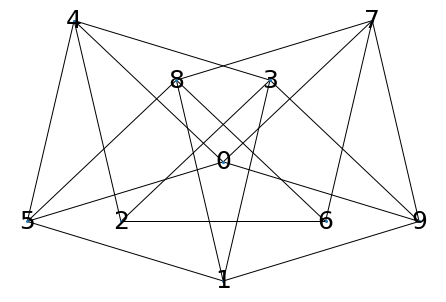

Checking: 19 edges.


True

In [194]:
# Load from file now... It's the same one as was found above.
G2_ps = cnp.points.fromFile("graphs/mos_10.vtx")
print(G2_ps)
G2 = cnp.graph.Graph((G2_ps, [complex(p) for p in G2_ps]))
G2.show(with_labels=True)

G2.checkNetXGraph()

[1309, 5943, 14599, 16816, 17595, 17744, 23470, 23632, 28148, 29019]


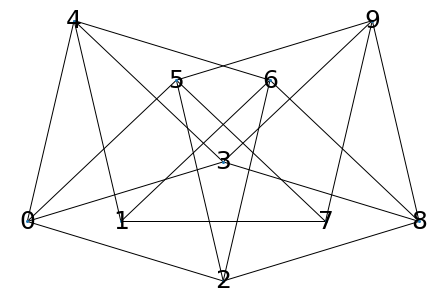

In [182]:
# Look for nodes which must be the same colour.
print(G.G.nodes)
P2 = [G.P[ix] for ix in G.G.nodes]

# Make a new graph

G2 = cnp.graph.Graph((P2, [complex(p) for p in P2]))
G2.show(with_labels=True)

In [195]:
# Metrics of graph.
mnx = 100
mxx = -100
for p in P2:
    mnx = min(mnx, sp.re(p))
    mxx = max(mxx, sp.re(p))
    
print("Height is", mxx - mnx)

Height is sqrt(33)/3


19


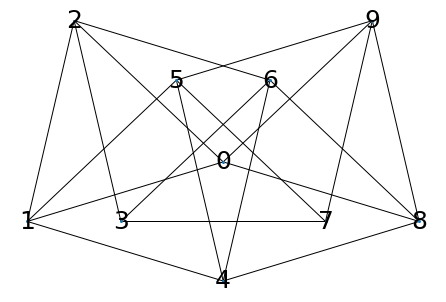

In [174]:
G2 = cnp.graph.Graph((P2, [complex(p) for p in P2]))
print(len(G2.G.edges))

mapping={0:'a',1:'b',2:'c'}
# TODO: Update mapping, no longer will be correct after rerunning.
G2.G = nx.relabel_nodes(G2.G, {3:0, 0:1, 4:2, 1:3, 2:4})
G2.show(with_labels=True)

# Proof:
# Without loss of generality, arbitrarily assign colours A, B, C to the triangle
# formed by 0,1,2. p0 = A, p1 = B, p2 = C

# Next, observe that p8,p9 must contain colours B,C in one of two ways.

# 1. p2 = p9 (symmetric colouring)
# This breaks in a forced sequence (choosing the only available colour) 
# after colouring p8 then p5, p7 and p6, p3 showing that p3 = p7

# 2. p2 = p8 (asymetric colouring)
# This breaks simarly after colouring p9 then, p4 and p5, p6, and p3, p7 showing again that p3 = p7

# I'm sure there're far neater ways of prooving it but I'll take it!

[-7*sqrt(33)/36 + 5/4 + I*(-13*sqrt(3)/36 + sqrt(11)/4), -sqrt(33)/36 + 3/4 + I*(-13*sqrt(3)/36 + sqrt(11)/4), -sqrt(33)/36 + 5/4 + I*(-19*sqrt(3)/36 + sqrt(11)/4), -sqrt(33)/9 + 1 + I*(-5*sqrt(3)/18 + sqrt(11)/2), -sqrt(33)/9 + 3/2 + I*(-4*sqrt(3)/9 + sqrt(11)/2), sqrt(33)/18 + 1 + I*(-4*sqrt(3)/9 + sqrt(11)/2), -sqrt(33)/36 + 7/4 + I*(-13*sqrt(3)/36 + sqrt(11)/4), 5*sqrt(33)/36 + 5/4 + I*(-13*sqrt(3)/36 + sqrt(11)/4), sqrt(33)/18 + 3/2 + I*(-5*sqrt(3)/18 + sqrt(11)/2)]


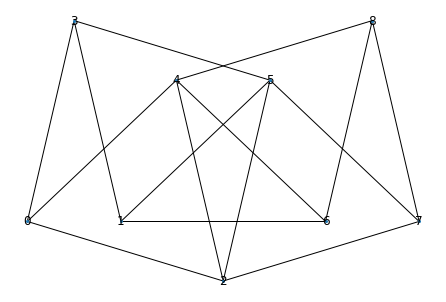

In [156]:
# Make a new graph without the central point.
P3 = P2[0:3] + P2[4:]
print(P3)
G3 = cnp.graph.Graph((P3, [complex(p) for p in P3]))
G3.show(with_labels=True)

[-7*sqrt(33)/36 + 5/4 + I*(-13*sqrt(3)/36 + sqrt(11)/4), -sqrt(33)/36 + 3/4 + I*(-13*sqrt(3)/36 + sqrt(11)/4), -sqrt(33)/36 + 5/4 + I*(-19*sqrt(3)/36 + sqrt(11)/4), -sqrt(33)/9 + 1 + I*(-5*sqrt(3)/18 + sqrt(11)/2), -sqrt(33)/9 + 3/2 + I*(-4*sqrt(3)/9 + sqrt(11)/2), sqrt(33)/18 + 1 + I*(-4*sqrt(3)/9 + sqrt(11)/2), -sqrt(33)/36 + 7/4 + I*(-13*sqrt(3)/36 + sqrt(11)/4), 5*sqrt(33)/36 + 5/4 + I*(-13*sqrt(3)/36 + sqrt(11)/4), sqrt(33)/18 + 3/2 + I*(-5*sqrt(3)/18 + sqrt(11)/2)]
[[1, -25], [-1, 25], [2, -26], [-2, 26], [3, -27], [-3, 27], [10, -22], [-10, 22], [11, -23], [-11, 23], [12, -24], [-12, 24]]
False
Created formula
Core extraction

c testing node: 8 -> sat (keeping 8)
c testing node: 7 -> sat (keeping 7)
c testing node: 6 -> sat (keeping 6)
c testing node: 5 -> sat (keeping 5)
c testing node: 4 -> sat (keeping 4)
c testing node: 3 -> sat (keeping 3)
c testing node: 2 -> sat (keeping 2)
c testing node: 1 -> sat (keeping 1)
c testing node: 0 -> sat (keeping 0)
Removing 0 nodes. 13 left

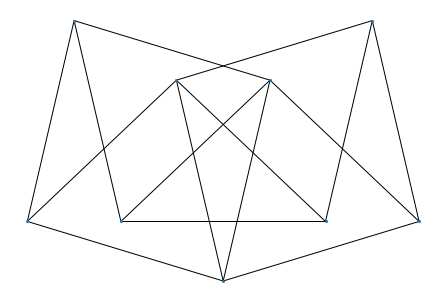

In [157]:
print(G3.P)

# Don't remove these nodes for proofs.
req_nodes = [0, 7, 3, 8]

clauses = cnp.sat.colourEqualsConstraint(0, 8, num_colours=3)
clauses += cnp.sat.colourEqualsConstraint(3, 7, num_colours=3)


print(clauses)

print(isColourable(G3, 3, extra_clauses=clauses))

# Generate min graph that shows that...
cnp.sat.optimize(G3, num_colours=3, extract_MUS=True, required_cl=clauses,
                 required_nodes=req_nodes, verbosity=2)

G3.show()